# Importing the dataset

In [1]:
import pandas as pd # Imported to enable the use of datastructures like dataframe
import matplotlib.pyplot as plt # Imported to visusalise data
import seaborn as sns # Imported to visualise data
from sklearn.metrics import confusion_matrix, classification_report # for report generation

In [2]:
## Importing the datasets
train_path='Original_Train_Data.xlsx'
val_path='Original_Val_Data.xlsx'
test_path='Original_Test_Data.xlsx'
new_test_path='Re-AnnotatedDataset.xlsx'

df_train = pd.read_excel(train_path, sheet_name='Sheet1')
df_val = pd.read_excel(val_path, sheet_name='Sheet1')
df_test = pd.read_excel(test_path, sheet_name='Sheet1')
df_new_test = pd.read_excel(new_test_path, sheet_name='Sheet1')


In [6]:
print(df_train.shape)
print(df_test)

(4851, 3)
               id                                               text  \
0        ml_sen_1            Bollywood film Newton inte remake aano?   
1        ml_sen_2  endukond viewrs koodunnilla ?? ippozhum 2.8m a...   
2        ml_sen_3  Mara paazhu mega mairananil ninnum ethil koodu...   
3        ml_sen_4                       Video nay cang xem cang thit   
4        ml_sen_5  Sunny chechiye kaanan vannathu njan maathram aano   
...           ...                                                ...   
1343  ml_sen_1344                          143k views and 145k likes   
1344  ml_sen_1345               Nasik doll tiltle bgm aane highlight   
1345  ml_sen_1346  Mohanlalile ishtapetta vekthiyayirunnu njan pa...   
1346  ml_sen_1347            ivaruku ivlo age nu sonna evan nambuvan   
1347  ml_sen_1348  Kanditt Amala Paul Aadai tamil mattoru version...   

           category  label_num  
0           Neutral          3  
1           Neutral          3  
2          Negative       

In [7]:
df_train['label_num'] = df_train.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df_val['label_num'] = df_val.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df_test['label_num'] = df_test.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df_new_test['label_num'] = df_new_test.label.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})


In [8]:
# copy train('text') to x_train
# copy train('category') to y_train

X_train = df_train['text']
y_train = df_train['label_num']

X_val = df_val['text']
y_val = df_val['label_num']

X_test = df_test['text']
y_test = df_test['label_num']

X_new_test = df_new_test['text']
y_new_test = df_new_test['label_num']

# copy test('text') to x_test





# Training the model

In [9]:
model_name = "bert-base-multilingual-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=5)

NameError: name 'BertTokenizer' is not defined

In [91]:
max_len= 128
# Tokenize and encode the sentences
X_train_encoded = tokenizer.batch_encode_plus(X_train.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(X_val.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(X_test.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

X_new_test_encoded = tokenizer.batch_encode_plus(X_new_test.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')


In [92]:
k = 0
print('Training Comments -->>',X_train[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',y_train[k])


Training Comments -->>  hoo mammokka police vesham aaha anthas

Input Ids -->>
 tf.Tensor(
[  101 10616 10132 19324 73427 10358 13202 52133 12947 17612 10911 14337
 19926   102     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0], shape=(84,), dtype=int32)

Decoded Ids -->>
 [CLS] hoo mammokka police vesham aaha anthas [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [93]:
# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [94]:
# Step 5: Train the model
history = model.fit(
	[X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
	y_train,
	validation_data=(
	[X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
	batch_size=32,
	epochs=6
)


Epoch 1/6
152/152 [==============================] - 130s 579ms/step - loss: 1.2398 - accuracy: 0.5028 - val_loss: 1.0740 - val_accuracy: 0.5852
Epoch 2/6
152/152 [==============================] - 83s 547ms/step - loss: 0.8976 - accuracy: 0.6722 - val_loss: 0.8626 - val_accuracy: 0.6759
Epoch 3/6
152/152 [==============================] - 83s 547ms/step - loss: 0.7217 - accuracy: 0.7392 - val_loss: 0.8643 - val_accuracy: 0.6833
Epoch 4/6
152/152 [==============================] - 83s 546ms/step - loss: 0.5577 - accuracy: 0.8007 - val_loss: 0.9920 - val_accuracy: 0.6630
Epoch 5/6
152/152 [==============================] - 83s 547ms/step - loss: 0.4575 - accuracy: 0.8427 - val_loss: 0.8960 - val_accuracy: 0.6963
Epoch 6/6
152/152 [==============================] - 83s 544ms/step - loss: 0.3279 - accuracy: 0.8938 - val_loss: 0.9474 - val_accuracy: 0.6815


In [95]:
#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
	[X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']],
	y_test
)
print("Original Research Results")
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')


43/43 [==============================] - 10s 160ms/step - loss: 0.9571 - accuracy: 0.7092
Original Research Results
Test loss: 0.9571280479431152, Test accuracy: 0.7091988325119019


In [98]:
#Evaluate the model on the test data
new_test_loss, new_test_accuracy = model.evaluate(
	[X_new_test_encoded['input_ids'], X_new_test_encoded['token_type_ids'], X_new_test_encoded['attention_mask']],
	y_new_test
)
print("Newly annotated Research Results")
print(f'Test loss: {new_test_loss}, Test accuracy: {new_test_accuracy}')


35/35 [==============================] - 6s 168ms/step - loss: 1.8284 - accuracy: 0.5236
Newly annotated Research Results
Test loss: 1.8283554315567017, Test accuracy: 0.5236363410949707


In [99]:
path = 'path-to-save'
# Save tokenizer
tokenizer.save_pretrained(path +'/Tokenizer')

# Save model
model.save_pretrained(path +'/Model')


# Original Results

In [100]:
pred = model.predict(
	[X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

# Positive':0,
#     'Negative':1,
#     'Mixed_feelings':2,
#     'Neutral':3,
#     'Not-Malayalam':4


label = {
	0: 'Positive',
	1: 'Negative',
  2: 'Mixed_feelings',
  3: 'Neutral',
  4: 'Not-Malayalam'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label :', Actual[:10])


43/43 [==============================] - 10s 163ms/step
Predicted Label : ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Negative']
Actual Label : ['Neutral', 'Neutral', 'Negative', 'Not-Malayalam', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Not-Malayalam', 'Negative']


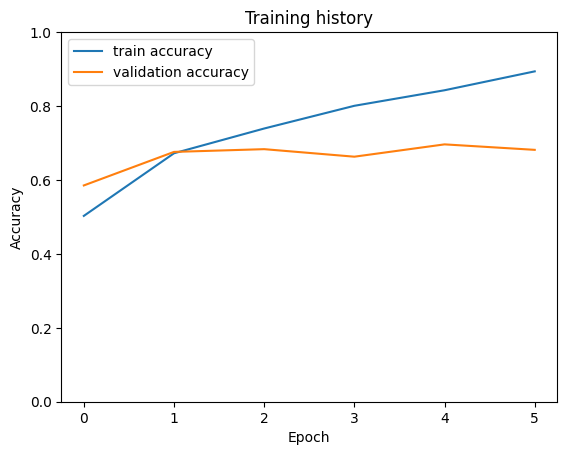

In [101]:
# Access the history attribute to get the training history
acc = history.history['accuracy']  # Might be 'acc' in some versions of TensorFlow/Keras
val_acc = history.history['val_accuracy']  # Might be 'val_acc' in some versions

# Plot training and validation accuracy
plt.plot(acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

# Graph characteristics
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])
plt.show()

In [102]:
print("Classification Report: \n", classification_report(Actual, pred_labels))


Classification Report: 
                 precision    recall  f1-score   support

Mixed_feelings       0.42      0.40      0.41        70
      Negative       0.61      0.52      0.56       138
       Neutral       0.64      0.73      0.68       398
 Not-Malayalam       0.84      0.76      0.80       177
      Positive       0.79      0.76      0.77       565

      accuracy                           0.71      1348
     macro avg       0.66      0.63      0.64      1348
  weighted avg       0.71      0.71      0.71      1348



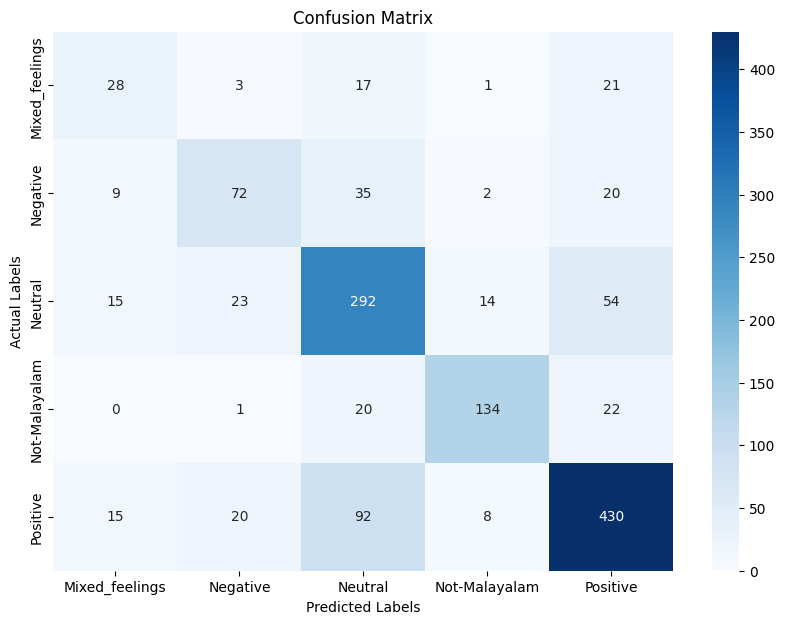

In [103]:
# Generate the confusion matrix
cm = confusion_matrix(Actual, pred_labels)
class_names = np.unique(Actual)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Newly Annotated Results

In [105]:


pred = model.predict(
	[X_new_test_encoded['input_ids'], X_new_test_encoded['token_type_ids'], X_new_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

# Positive':0,
#     'Negative':1,
#     'Mixed_feelings':2,
#     'Neutral':3,
#     'Not-Malayalam':4


label = {
	0: 'Positive',
	1: 'Negative',
  2: 'Mixed_feelings',
  3: 'Neutral',
  4: 'Not-Malayalam'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_new_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label :', Actual[:10])


35/35 [==============================] - 6s 161ms/step
Predicted Label : ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Negative']
Actual Label : ['Neutral', 'Mixed_feelings', 'Negative', 'Not-Malayalam', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Mixed_feelings']


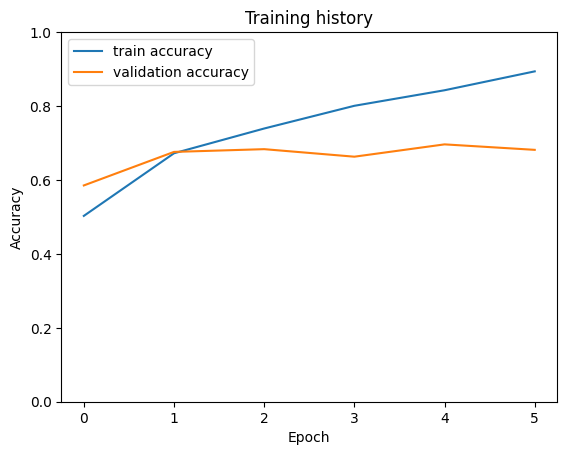

In [106]:
# Access the history attribute to get the training history
acc = history.history['accuracy']  # Might be 'acc' in some versions of TensorFlow/Keras
val_acc = history.history['val_accuracy']  # Might be 'val_acc' in some versions

# Plot training and validation accuracy
plt.plot(acc, label='train accuracy')
plt.plot(val_acc, label='validation accuracy')

# Graph characteristics
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])
plt.show()

In [107]:
print("Classification Report: \n", classification_report(Actual, pred_labels))


Classification Report: 
                 precision    recall  f1-score   support

Mixed_feelings       0.28      0.10      0.15       144
      Negative       0.53      0.33      0.40       168
       Neutral       0.44      0.65      0.53       252
 Not-Malayalam       0.31      0.57      0.40        72
      Positive       0.68      0.65      0.67       464

      accuracy                           0.52      1100
     macro avg       0.45      0.46      0.43      1100
  weighted avg       0.53      0.52      0.51      1100



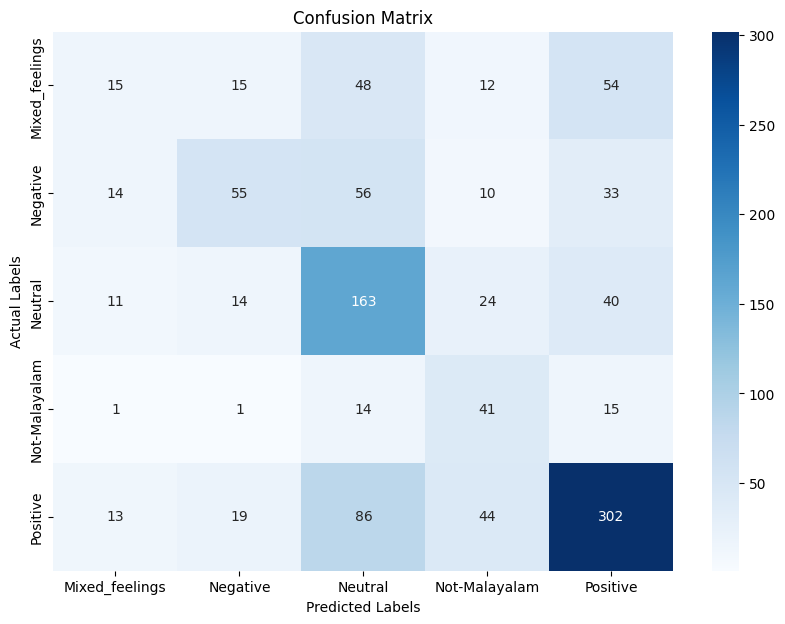

In [108]:
# Generate the confusion matrix
cm = confusion_matrix(Actual, pred_labels)
class_names = np.unique(Actual)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()